#1. Importing and first view of dataset

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from collections import Counter
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/netflix_titles - diego.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
netflix = pd.read_csv('/content/drive/MyDrive/netflix_titles - diego.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# 2. Data Cleaning

## 2.1 Duplicates

In [ ]:
print(f"{netflix.duplicated().sum()} duplicated rows found")

0 duplicated rows found


## 2.2 Null Values

In [ ]:
# Look at missing value proportions of each columns
missing_points = round(netflix.isnull().sum()/netflix.shape[0]*100,2)
missing_points

show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64

Column 'director' missed 30% of the values.

'cast' and 'country'columns missed about 9.4% .

These column contain strings, for now, one option is to fill in these nulls with 'unknown'.

In [ ]:
#Filling with 'unknown'
columns_to_fill = ['director','cast','country']
netflix[columns_to_fill] = netflix[columns_to_fill].fillna('unknown')

#Filling duration and ratings with 'unknown'
netflix[['duration','rating']] = netflix[['duration','rating']].fillna('unknown')

#Filling empty dates with the previous non null cell value.
netflix['date_added'] = netflix['date_added'].ffill()


In [ ]:
# parsing release_year and date_added columns

#release_year:
netflix.release_year = pd.to_datetime(netflix.release_year,format = '%Y')
print(f" Parsed: \n{netflix.release_year.head(2)}\n")

#date_added:
netflix.date_added = pd.to_datetime(netflix.date_added,format = 'mixed')
print(f" Parsed: \n{netflix.date_added.head(2)}\n")

 Parsed: 
0   2020-01-01
1   2021-01-01
Name: release_year, dtype: datetime64[ns]

 Parsed: 
0   2021-09-25
1   2021-09-24
Name: date_added, dtype: datetime64[ns]



In [ ]:
#Check nulls again
print(f"{netflix.isna().sum().sum()} null values left.")

0 null values left.


All missing points have been handled.

## 2.3 Content Types

In [ ]:
#make a copy of the cleaned dataset
df = netflix.copy()

#TV Show and Movie counts
types = df['type'].value_counts()
print(f'There are {types.iloc[0]} Movies and {types.iloc[1]} TV Shows in this Dataset.')

There are 6131 Movies and 2676 TV Shows in this Dataset.


# 3. Data Visualization

## 3.1 Content Types By Region

In [ ]:
# Extract country and type columns
country_type = df[['country', 'type']].copy()

# Data standarizing
country_type['country'] = country_type['country'].str.split(", ")
country_type = country_type.explode('country')
country_type.head(20)

# Get # of types for each country
country_counts =country_type.groupby(['country','type']).size().unstack(fill_value = 0)


# Selecting top 20 countries with max count of TV Show and Movie
top_countries = country_counts.sum(axis = 1).nlargest(20).index
top_country_counts = country_counts.loc[top_countries]

# Reset index and visualize it
top_country_counts = top_country_counts.reset_index()

import plotly.graph_objects as go

# Ploting in stacked bar chart.
fig = go.Figure(data=[
    go.Bar(name='Movie', x=top_country_counts['country'], y=top_country_counts['Movie']),
    go.Bar(name='TV Show', x=top_country_counts['country'], y=top_country_counts['TV Show'])
])

# Layout updates
fig.update_layout(
    barmode='stack',
    title = 'Top 20 Countries With Most Contents on Netflix',
    xaxis_title = 'Countries',
    yaxis_title = 'Counts',
    height = 500)

# Show visual
fig.show()

<ipython-input-3-f06ce575d4da>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(netflix, x='release_year', y='type', inner='box', palette='Dark2')


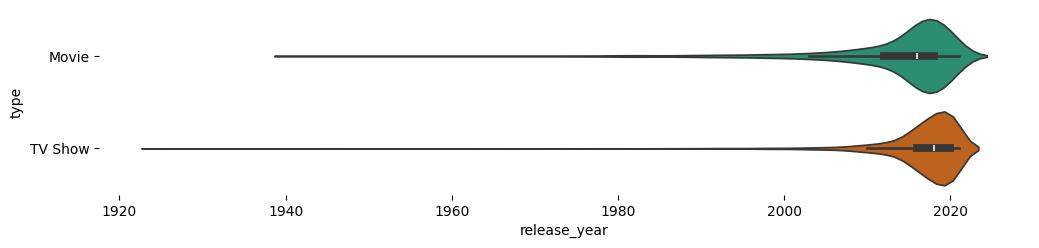

In [ ]:
# @title type vs release_year

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(netflix['type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(netflix, x='release_year', y='type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## 3.2 Top 20 Genres

In [ ]:
category = ", ".join(df['listed_in']).split(", ")
category = Counter(category).most_common(20)
category = pd.DataFrame(category, columns=['Category', 'Count']).sort_values(by ="Count")

# In bar chart
fig = px.bar(category, x = 'Category', y = 'Count')

# Layout
fig.update_layout(
    title = 'Top 20 Grenres on Netflix',
    xaxis_title = 'Genre',
    yaxis_title = 'Counts',
    width=700,
    height=430
)

fig.show()

## 3.3 Content Trend

In [ ]:
# Keep only year in column year_added
df = netflix
df['year_added'] = df['date_added'].dt.year

# Extract type and year_added columns
contents = df[['year_added','type']].copy()

# Get # of contents per year
contents_per_year = contents.groupby(['year_added','type']).size().unstack(fill_value = 0).reset_index()


# Ploting in Line Chart

fig = px.line(contents_per_year, x= 'year_added', y=['Movie', 'TV Show'], markers=True)

# Layout
fig.update_layout(
    title='Content Trend over Years',
    xaxis_title='Year',
    yaxis_title='Count',
    legend_title='Type',
    width=700,
    height=380
)

fig.show()

## 3.4 Ratings

In [ ]:
# Rating Distribution:
rating = df.groupby(['rating']).size().reset_index(name = "counts")
rating = rating.sort_values(by = 'counts', ascending = False)

# In Bar
fig = px.bar(rating, x = 'rating', y= 'counts')

#Layout
fig.update_layout(
    title = 'Rating Distribution',
    xaxis_title = 'Ratings',
    yaxis_title = 'Counts',
    width=700,
    height=380
)

fig.show()

## 3.5 Content Duration

**Movie Duration**

In [ ]:
# Content Duration:
# Movie
movies = df[['duration','listed_in','type']]

movies = movies[movies['type'] == 'Movie'].copy()

# Removing trailing spaces, keep minute only.
movies['duration'] = movies['duration'].str.extract('(\d+)').astype(float)

# Split listed_in by ", ".
movies['listed_in'] = movies['listed_in'].str.split(', ')

# Explode listed_in
movies = movies.explode('listed_in')

# Calculate average duration of each genre.
avg_movie_duration = round(movies.groupby('listed_in')['duration'].mean(),2).sort_values(ascending = False)

# Convert it to DataFrame
avg_movie_duration = avg_movie_duration.reset_index()

# Rename columns
avg_movie_duration.columns = ['genre','mean duration']


# Ploting in bar chart.
fig = px.bar(avg_movie_duration, x = 'genre', y = 'mean duration')

#layout
fig.update_layout(
    title = 'Average Movie Duration By Genres',
    xaxis_title = 'genres',
    yaxis_title = 'minuets',
    width = 800,
    height = 400
)

fig.show()

**TV Show Duration (in season)**

In [ ]:
#TV Show average duration

TV = df[['duration','listed_in','type']]

TV = TV[TV['type'] == 'TV Show'].copy()

# Keep only digit parts of duration column as minutes

TV['seasons'] = TV['duration'].str.extract('(\d+)').astype(float)

# Split listed_in column
TV['listed_in'] = TV['listed_in'].str.split(', ')

# Explode listed_in column to ensure each row has one genre.
TV = TV.explode('listed_in')

# Calculate mean duration for each genre.
avg_TV_duration = round(TV.groupby('listed_in')['seasons'].mean(),2).sort_values(ascending = False)

# Ploting in bar chart.
fig = px.bar(avg_TV_duration)

#layout
fig.update_layout(
    title = 'Average TV seasons by genres',
    xaxis_title = 'genres',
    yaxis_title = 'seasons',
    width = 800,
    height = 600
)


fig.show()

## 3.6 Genre by Country

**This section will be looking at 5 Countries with the most contents.**

In [ ]:
# Extract country and listed_in columns
genres = df[['country','listed_in']].copy()

# Country column data standarizing
genres['country'] = genres['country'].str.split(", ")
genres = genres.explode('country')

# listed_in column data standarizing
genres['listed_in'] = genres['listed_in'].str.split(", ")
genres = genres.explode('listed_in')

# Top 5 country names (excluded unknown country group)
top_5_countries = top_country_counts[top_country_counts['country'] != 'unknown' ].head(5)['country']
top_5_countries

0     United States
1             India
3    United Kingdom
4            Canada
5            France
Name: country, dtype: object

In [ ]:
# United States
US_genre = genres[genres['country'] == 'United States']
US_genre = US_genre.groupby('listed_in').size().sort_values(ascending = False).head(10)
US_genre = US_genre.reset_index()
US_genre.columns = ['genre','count']

# India
India_genre = genres[genres['country'] == 'India']
India_genre = India_genre.groupby('listed_in').size().sort_values(ascending = False).head(10)
India_genre = India_genre.reset_index()
India_genre.columns = ['genre','count']

# United Kingdom
UK_genre = genres[genres['country'] == 'United Kingdom']
UK_genre = UK_genre.groupby('listed_in').size().sort_values(ascending = False).head(10)
UK_genre = UK_genre.reset_index()
UK_genre.columns = ['genre','count']

# Canada
Canada_genre = genres[genres['country'] == 'Canada']
Canada_genre = Canada_genre.groupby('listed_in').size().sort_values(ascending = False).head(10)
Canada_genre = Canada_genre.reset_index()
Canada_genre.columns = ['genre','count']

# France
France_genre = genres[genres['country'] == 'France']
France_genre = France_genre.groupby('listed_in').size().sort_values(ascending = False).head(10)
France_genre = France_genre.reset_index()
France_genre.columns = ['genre','count']

In [ ]:
fig = px.pie(US_genre, values = 'count', names = 'genre')

fig.update_layout(
    title = 'Top 10 US Genre',
    width = 600,
    height = 500
)
fig.show()

In [ ]:
fig = px.pie(India_genre, values = 'count', names = 'genre')

fig.update_layout(
    title = 'Top 10 India Genre',
    width = 600,
    height = 500
)
fig.show()

In [ ]:
fig = px.pie(UK_genre, values = 'count', names = 'genre')

fig.update_layout(
    title = 'Top 10 UK Genre',
    width = 600,
    height = 500
)
fig.show()

In [ ]:
fig = px.pie(Canada_genre, values = 'count', names = 'genre')

fig.update_layout(
    title = 'Top 10 Canada Genre',
    width = 600,
    height = 500
)
fig.show()

In [ ]:
fig = px.pie(France_genre, values = 'count', names = 'genre')

fig.update_layout(
    title = 'Top 10 France Genre',
    width = 600,
    height = 500
)
fig.show()